In [1]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:

df1 = pd.read_csv("Bangladesh_property_prices.csv")
df1.head()

,Unnamed: 0.1,Unnamed: 0,Location,Price,Type,No. Beds,No. Baths,Area,Latitude,Longitude,Region,Sub-region
0,0,0.0,"Sector 10, Uttara, Dhaka",7500000,Apartment,3.0,3.0,1300.0,23.86846,90.39280,Uttara,Sector 10
1,1,1.0,"Section 11, Mirpur, Dhaka",7280000,Apartment,4.0,4.0,1456.0,23.81223,90.35967,Mirpur,Section 11
2,2,2.0,"Chowdhuripara, Khilgaon, Dhaka",13000000,Apartment,3.0,3.0,1550.0,23.75349,90.42469,Khilgaon,Chowdhuripara
3,3,3.0,"Road No 4, Banani, Dhaka",37000000,Apartment,3.0,3.0,2669.0,23.78855,90.40081,Banani,Road No 4
4,4,4.0,"South Banasree Project, Banasree, Dhaka",3600000,Apartment,2.0,2.0,835.0,23.76354,90.43180,Banasree,South Banasree Project


In [3]:
df2 = df1.drop(['Unnamed: 0.1','Unnamed: 0','Location','Type','Latitude','Sub-region','Longitude'],axis='columns')
df2.shape

(4704, 5)

In [4]:
df2.isnull().sum()

Price          0
No. Beds     204
No. Baths    204
Area           0
Region         0
dtype: int64

In [5]:

df3 = df2.dropna()
df3.isnull().sum()


Price        0
No. Beds     0
No. Baths    0
Area         0
Region       0
dtype: int64

In [9]:
df4 = df3.copy()
df4['price_per_sqft'] = df4['Price']/(df4*1000)['Area']
df4.head()

,Price,No. Beds,No. Baths,Area,Region,price_per_sqft
0,7500000,3.0,3.0,1300.0,Uttara,5.769231
1,7280000,4.0,4.0,1456.0,Mirpur,5.000000
2,13000000,3.0,3.0,1550.0,Khilgaon,8.387097
3,37000000,3.0,3.0,2669.0,Banani,13.862870
4,3600000,2.0,2.0,835.0,Banasree,4.311377


In [10]:

df4_stats = df4['price_per_sqft'].describe()
df4_stats

count    4500.000000
mean        6.222235
std         2.604004
min         0.416667
25%         4.558791
50%         5.569679
75%         7.000000
max        30.000000
Name: price_per_sqft, dtype: float64

In [12]:
df4.Region = df4.Region.apply(lambda x: x.strip())
location_stats = df4['Region'].value_counts(ascending=False)
location_stats

Region
Mirpur            830
Mohammadpur       398
BashundharaR-A    323
Uttara            318
Badda             228
                 ... 
UttarKhan           2
Kafrul              2
Nadda               1
Taltola             1
Shahbagh            1
Name: count, Length: 66, dtype: int64

In [14]:

location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Region
BaridharaDOHS        9
Kotwali              8
Paribagh             7
Kachukhet            7
Hatirpool            7
JoarSahara           7
Shegunbagicha        6
Khilkhet             6
NewMarket            5
NorthShahjahanpur    5
Zafrabad             3
MohakhaliDOHS        3
Kuril                3
Nikunja              3
Maniknagar           2
BananiDOHS           2
UttarKhan            2
Kafrul               2
Nadda                1
Taltola              1
Shahbagh             1
Name: count, dtype: int64

In [16]:

len(df4.Region.unique())

66

In [17]:
df4.head()

,Price,No. Beds,No. Baths,Area,Region,price_per_sqft
0,7500000,3.0,3.0,1300.0,Uttara,5.769231
1,7280000,4.0,4.0,1456.0,Mirpur,5.000000
2,13000000,3.0,3.0,1550.0,Khilgaon,8.387097
3,37000000,3.0,3.0,2669.0,Banani,13.862870
4,3600000,2.0,2.0,835.0,Banasree,4.311377


In [18]:
df4["Price"] = df4["Price"] / 100000

In [19]:
df4.head()

,Price,No. Beds,No. Baths,Area,Region,price_per_sqft
0,75.0,3.0,3.0,1300.0,Uttara,5.769231
1,72.8,4.0,4.0,1456.0,Mirpur,5.000000
2,130.0,3.0,3.0,1550.0,Khilgaon,8.387097
3,370.0,3.0,3.0,2669.0,Banani,13.862870
4,36.0,2.0,2.0,835.0,Banasree,4.311377


In [21]:

df5= df4

In [22]:
df5[(df5.Area/df5['No. Beds'])<120].head()

,Price,No. Beds,No. Baths,Area,Region,price_per_sqft


In [23]:
df6 = df5[~(df5.Area/df5['No. Beds']<120)]
df6.shape
df6.head()

,Price,No. Beds,No. Baths,Area,Region,price_per_sqft
0,75.0,3.0,3.0,1300.0,Uttara,5.769231
1,72.8,4.0,4.0,1456.0,Mirpur,5.000000
2,130.0,3.0,3.0,1550.0,Khilgaon,8.387097
3,370.0,3.0,3.0,2669.0,Banani,13.862870
4,36.0,2.0,2.0,835.0,Banasree,4.311377


In [24]:
df6.price_per_sqft.describe()

count    4500.000000
mean        6.222235
std         2.604004
min         0.416667
25%         4.558791
50%         5.569679
75%         7.000000
max        30.000000
Name: price_per_sqft, dtype: float64

In [26]:
def remove_pps_outliers(df): 
    df_out= pd.DataFrame()

    for key,subdf in df.groupby('Area'):
        m= np.mean(subdf.price_per_sqft)
        st= np.std(subdf.price_per_sqft)

        reduced_df= subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft < (m+st))]
        df_out= pd.concat([df_out, reduced_df],ignore_index=True)

    return df_out


df7= remove_pps_outliers(df6)
df7.head()
df6.price_per_sqft.describe()


count    4500.000000
mean        6.222235
std         2.604004
min         0.416667
25%         4.558791
50%         5.569679
75%         7.000000
max        30.000000
Name: price_per_sqft, dtype: float64

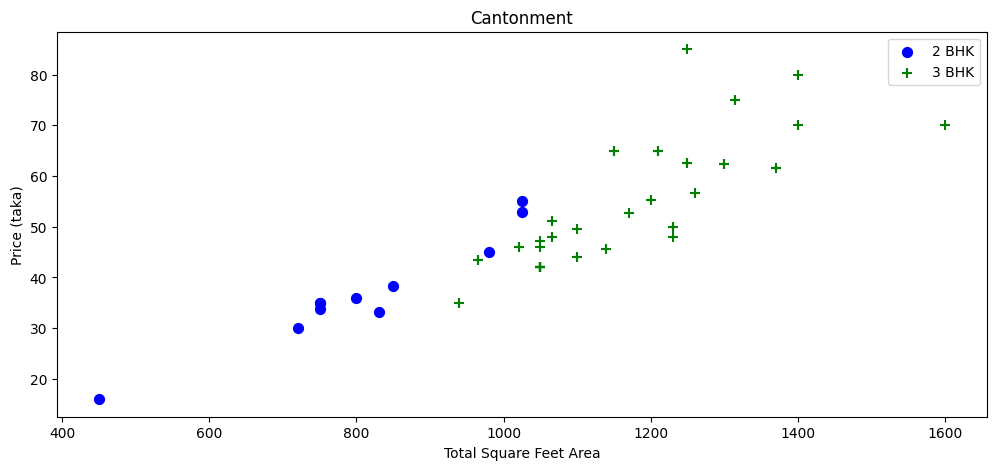

In [27]:
def plot_scatter_chart(df, Region): 
    bhk2= df[(df.Region== Region) & (df['No. Beds'] ==2)]
    bhk3= df[(df.Region== Region) & (df['No. Beds'] ==3)]
    matplotlib.rcParams['figure.figsize'] = (12,5)
    plt.scatter(bhk2.Area, bhk2.Price, color= 'blue',label='2 BHK', s=50) 
    plt.scatter(bhk3.Area, bhk3.Price,marker='+', color= 'green',label='3 BHK', s=50) 
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (taka)")
    plt.title(Region)
    plt.legend()

plot_scatter_chart(df7,"Cantonment")

In [28]:
def remove_bhk_outliers(df):
    """
    Removes outlier properties where the price per square foot (price_per_sqft)
    for a given number of bedrooms (bhk) is unusually low compared to the previous 
    bhk category within the same location.

    Parameters:
        df (DataFrame): Input DataFrame with 'location', 'bhk', and 'price_per_sqft' columns.

    Returns:
        DataFrame: A new DataFrame with outliers removed.
    """
    
    # Initialize an empty array to store the indices of rows to be excluded
    exclude_indices = np.array([])

    # Group the DataFrame by 'location'
    for location, location_df in df.groupby('Region'):
        # Create a dictionary to store statistics (mean, std, count) for each bhk in the current location
        bhk_stats = {}

        # Iterate over each bhk group within the current location
        for bhk, bhk_df in location_df.groupby('No. Beds'):
            # Calculate and store statistics for the current bhk group
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),  # Mean price per square foot
                'std': np.std(bhk_df.price_per_sqft),    # Standard deviation
                'count': bhk_df.shape[0]                 # Number of rows (count)
            }

        # Iterate again over each bhk group to identify and exclude outliers
        for bhk, bhk_df in location_df.groupby('No. Beds'):
            # Get statistics for the previous bhk (bhk-1)
            stats = bhk_stats.get(bhk - 1)

            # Check if statistics exist for bhk-1 and if the group has more than 5 rows
            if stats and stats['count'] > 5:
                # Identify rows in the current bhk group where price_per_sqft is below the mean of bhk-1
                outliers = bhk_df[bhk_df.price_per_sqft < stats['mean']].index.values

                # Append the indices of these rows to the exclude_indices array
                exclude_indices = np.append(exclude_indices, outliers)

    # Drop all rows with indices in exclude_indices and return the cleaned DataFrame
    return df.drop(exclude_indices, axis='index')


# Apply the function to remove BHK outliers from the DataFrame df7
df8 = remove_bhk_outliers(df7)

# Print the shape of the resulting DataFrame after removing outliers
df8.shape


(2274, 6)

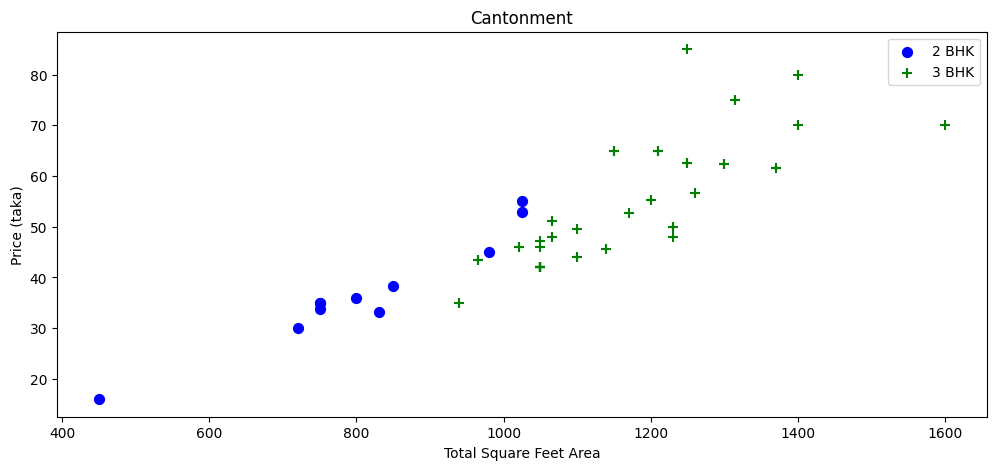

In [29]:
plot_scatter_chart(df7,"Cantonment")

Text(0, 0.5, 'count')

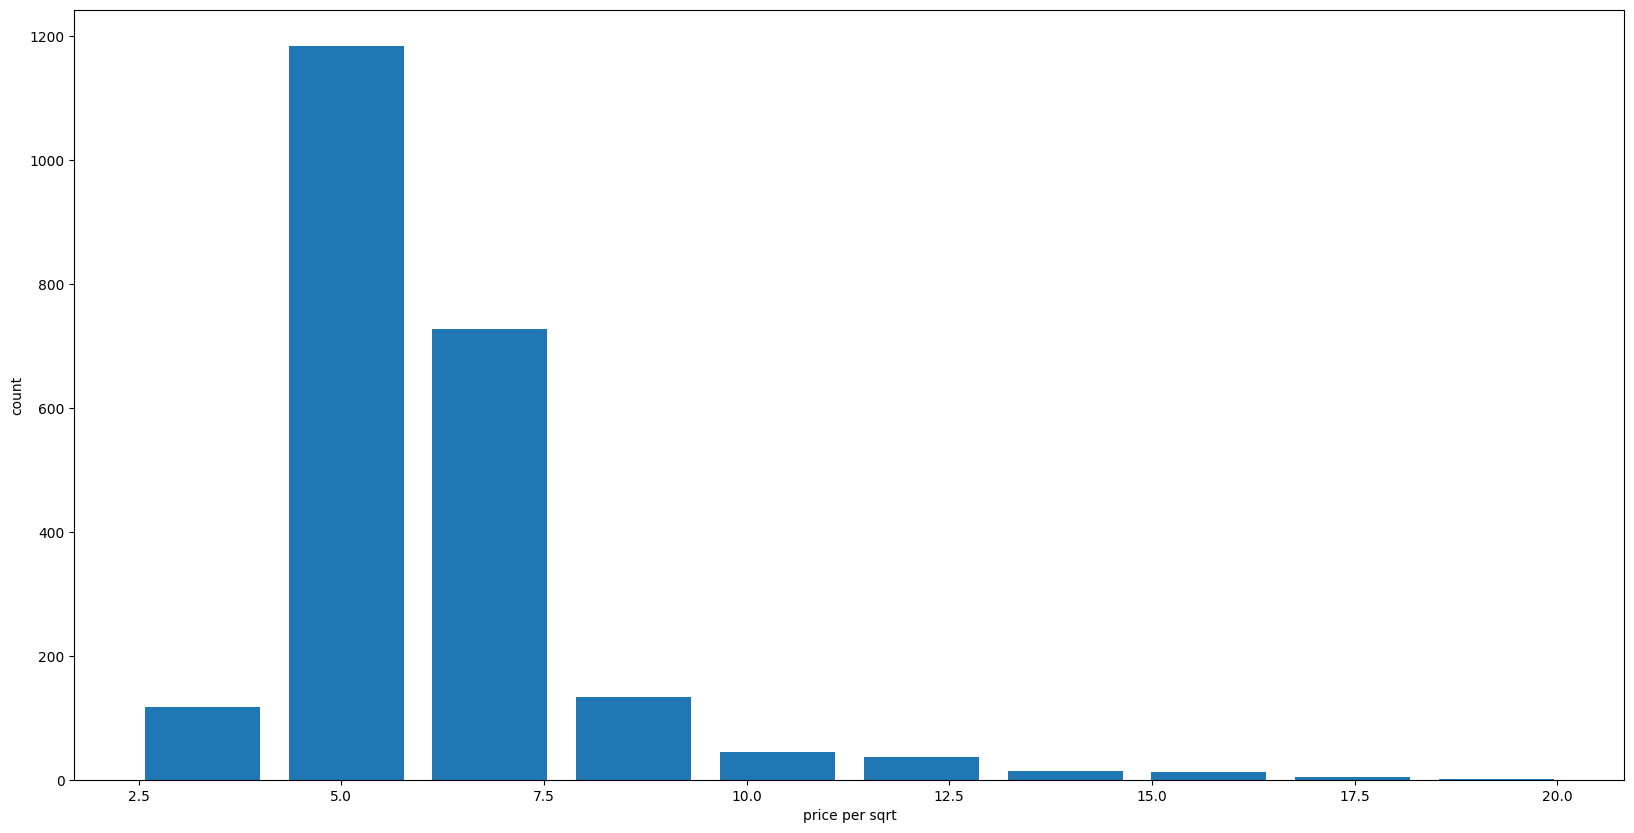

In [30]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft, rwidth=0.8) 
plt.xlabel('price per sqrt')
plt.ylabel('count')

In [31]:
df8['No. Baths'].unique()

array([1., 2., 3., 4., 5., 6., 8.])

Text(0, 0.5, 'Count')

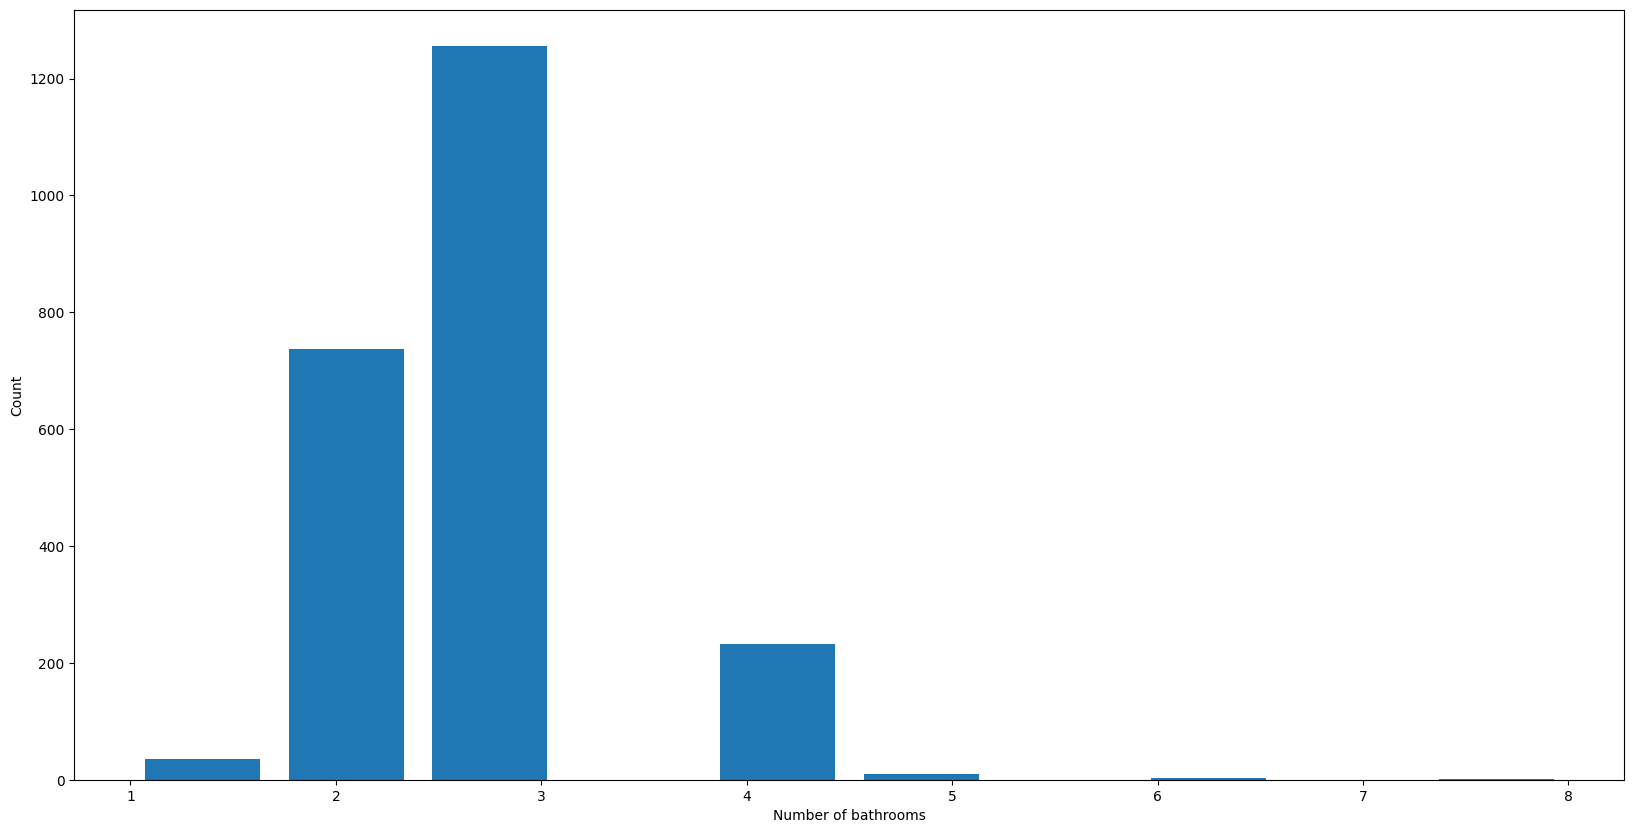

In [40]:
plt.hist(df8['No. Baths'],rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [33]:
df9= df8[df8['No. Baths'] > df8['No. Beds'] +2]

In [34]:
df9= df8[df8['No. Baths'] < df8['No. Beds'] +2]
df9.shape

(2271, 6)

In [35]:
df10 = df9.drop(['price_per_sqft'],axis='columns')
df10.head(3)

,Price,No. Beds,No. Baths,Area,Region
0,16.0,2.0,1.0,400.0,Mugdapara
1,16.0,2.0,1.0,400.0,Lalbagh
2,16.0,2.0,1.0,450.0,Cantonment


In [36]:
dummies= pd.get_dummies(df10.Region)
dummies.head()
dummies2 = dummies.astype(int)
dummies2.head()

,Adabor,AftabNagar,Agargaon,Badda,Banani,Banasree,Bangshal,Baridhara,Bashabo,BashundharaR-A,...,Shantinagar,Shegunbagicha,Shiddheswari,Shyamoli,Shyampur,Sutrapur,Tejgaon,Turag,Uttara,Zafrabad
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df11= pd.concat([df10, dummies2] ,axis='columns')
df11.head()

,Price,No. Beds,No. Baths,Area,Region,Adabor,AftabNagar,Agargaon,Badda,Banani,...,Shantinagar,Shegunbagicha,Shiddheswari,Shyamoli,Shyampur,Sutrapur,Tejgaon,Turag,Uttara,Zafrabad
0,16.0,2.0,1.0,400.0,Mugdapara,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16.0,2.0,1.0,400.0,Lalbagh,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16.0,2.0,1.0,450.0,Cantonment,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,18.3,2.0,1.0,450.0,Bangshal,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18.3,2.0,1.0,450.0,Bangshal,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:

df12 = df11.drop('Region',axis='columns')
df12.head(2)

,Price,No. Beds,No. Baths,Area,Adabor,AftabNagar,Agargaon,Badda,Banani,Banasree,...,Shantinagar,Shegunbagicha,Shiddheswari,Shyamoli,Shyampur,Sutrapur,Tejgaon,Turag,Uttara,Zafrabad
0,16.0,2.0,1.0,400.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16.0,2.0,1.0,400.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:

df12.shape

(2271, 64)

In [44]:

X = df12.drop(['Price'],axis='columns')
X.head(3)

,No. Beds,No. Baths,Area,Adabor,AftabNagar,Agargaon,Badda,Banani,Banasree,Bangshal,...,Shantinagar,Shegunbagicha,Shiddheswari,Shyamoli,Shyampur,Sutrapur,Tejgaon,Turag,Uttara,Zafrabad
0,2.0,1.0,400.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1.0,400.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1.0,450.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:

X.shape

(2271, 63)

In [46]:
y = df12.Price
y.head(3)

0    16.0
1    16.0
2    16.0
Name: Price, dtype: float64

In [47]:

len(y)

2271

In [56]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Define the model
dt_clf = DecisionTreeRegressor(random_state=42)

# Hyperparameter grid to search over
param_grid = {
    'criterion': ['squared_error', 'friedman_mse'],  # Different loss functions
    'splitter': ['best', 'random'],                  # Different splitting strategies
    'max_depth': [None, 5, 10, 15, 20],              # Maximum depth options
    'min_samples_split': [2, 5, 10],                 # Minimum samples required to split
    'min_samples_leaf': [1, 5, 10],                  # Minimum samples required at leaf node
    'max_features': [None, 'sqrt', 'log2'],          # Number of features to consider
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_clf, param_grid=param_grid, cv=5, scoring='r2')

# Fit GridSearchCV to training data
grid_search.fit(X_train, y_train)
grid_search.score(X_test, y_test)



0.9302864184615276

In [89]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
import pandas as pd

def find_best_model_using_gridsearchcv(x, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {  # Removed 'normalize' as it is no longer valid
                'fit_intercept': [True, False]  # Valid parameter for LinearRegression
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Example usage
# Assume X and y are your features and target variables
# If normalization/standardization is required, preprocess X as follows:

# X = StandardScaler().fit_transform(X)

# Call the function
find_best_model_using_gridsearchcv(X, y)
# print(df_results)


,model,best_score,best_params
0,linear_regression,0.857706,{'fit_intercept': True}
1,lasso,0.801572,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.925220,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [91]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return grid_search.predict([x])[0]

In [92]:
predict_price('Mohammadpur',1265, 3, 3)

C:\Users\akram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


np.float64(48.0)

In [93]:

import pickle
with open('Bangladesh_property_prices.pickle','wb') as f:
    pickle.dump(grid_search,f)

In [94]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))